In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '/global/common/cori/contrib/lsst/apps/anaconda/py2-envs/DESCQA/lib/python2.7/site-packages')

In [3]:
#!/global/common/cori/contrib/lsst/apps/anaconda/py2-envs/DESCQA/bin/python 

In [4]:
import subprocess
assert u'lsst' in subprocess.check_output(['groups']).decode().split(), 'You need to be in the `lsst` group for this notebook to work'

In [5]:
import GCRCatalogs

## check version
print('GCRCatalogs =', GCRCatalogs.__version__, '|' ,'GCR =', GCRCatalogs.GCR.__version__)

('GCRCatalogs =', '0.6.10', '|', 'GCR =', '0.6.2')


In [6]:
## list all find available catlaogs, sorted by their name
print('\n'.join(sorted(GCRCatalogs.get_available_catalogs())))

buzzard
buzzard_high-res
buzzard_test
dc1
protoDC2


In [7]:
## load 'protoDC2' catalog
gc = GCRCatalogs.load_catalog('buzzard_test')

In [8]:
print(', \n'.join(sorted(gc.list_all_quantities())))

Mag_true_Y_des_z01, 
Mag_true_g_des_z01, 
Mag_true_i_des_z01, 
Mag_true_r_des_z01, 
Mag_true_z_des_z01, 
convergence, 
dec, 
dec_true, 
ellipticity_1, 
ellipticity_1_true, 
ellipticity_2, 
ellipticity_2_true, 
galaxy_id, 
halo_id, 
halo_mass, 
is_central, 
mag_Y_des, 
mag_g_des, 
mag_i_des, 
mag_r_des, 
mag_z_des, 
magerr_Y_des, 
magerr_g_des, 
magerr_i_des, 
magerr_r_des, 
magerr_z_des, 
magnification, 
position_x, 
position_y, 
position_z, 
ra, 
ra_true, 
redshift, 
redshift_true, 
shear_1, 
shear_2, 
size, 
size_true, 
velocity_x, 
velocity_y, 
velocity_z


In [9]:
print('\n'.join(sorted(gc.list_all_native_quantities())[:]))

healpix_pixel
truth/AMAG/0
truth/AMAG/1
truth/AMAG/2
truth/AMAG/3
truth/AMAG/4
truth/CENTRAL
truth/COEFFS/0
truth/COEFFS/1
truth/COEFFS/2
truth/COEFFS/3
truth/COEFFS/4
truth/DEC
truth/DELTAM
truth/DIST8
truth/ECATID
truth/EPSILON/0
truth/EPSILON/1
truth/FLUX/0
truth/FLUX/1
truth/FLUX/2
truth/FLUX/3
truth/FLUX/4
truth/GAMMA1
truth/GAMMA2
truth/HALOID
truth/ID
truth/INDEX
truth/IVAR/0
truth/IVAR/1
truth/IVAR/2
truth/IVAR/3
truth/IVAR/4
truth/KAPPA
truth/LMAG/0
truth/LMAG/1
truth/LMAG/2
truth/LMAG/3
truth/LMAG/4
truth/M200
truth/MAG_R
truth/MU
truth/NGALS
truth/OMAG/0
truth/OMAG/1
truth/OMAG/2
truth/OMAG/3
truth/OMAG/4
truth/OMAGERR/0
truth/OMAGERR/1
truth/OMAGERR/2
truth/OMAGERR/3
truth/OMAGERR/4
truth/PDIST8
truth/PX
truth/PY
truth/PZ
truth/R200
truth/RA
truth/RHALO
truth/SIGMA5
truth/SIGMA5P
truth/SIZE
truth/TDEC
truth/TE/0
truth/TE/1
truth/TMAG/0
truth/TMAG/1
truth/TMAG/2
truth/TMAG/3
truth/TMAG/4
truth/TRA
truth/TSIZE
truth/VX
truth/VY
truth/VZ
truth/W
truth/Z


In [10]:
#moredata = gc.get_quantities(['totalMassStellar','totalStarFormationRate'])
data = gc.get_quantities(['mag_i_des','redshift'])
sz = data['redshift']
i = data['mag_i_des']

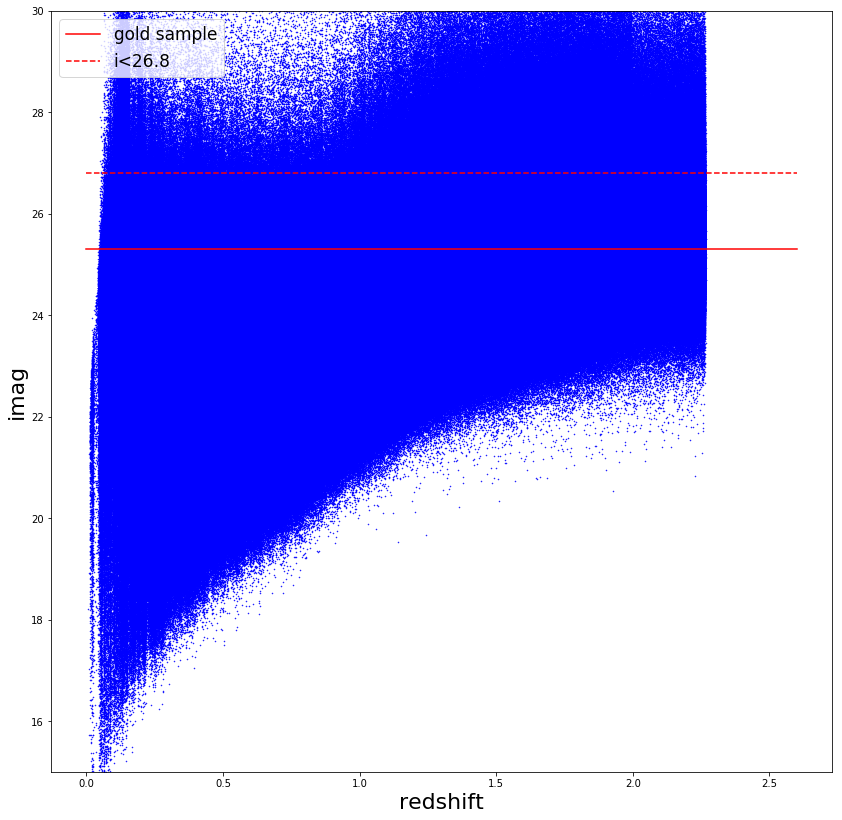

In [12]:
fig = plt.figure(figsize=(14,14))
plt.scatter(sz,i,marker='.',s=1,c='b')
plt.xlabel('redshift',fontsize=22)
plt.ylabel('imag',fontsize=22)
plt.ylim((15,30))
plt.plot([0.,2.6],[25.3,25.3],color='r',label = "gold sample")
plt.plot([0.,2.6],[26.8,26.8],color='r',linestyle='--',label = "i<26.8")
plt.legend(loc="upper left",fontsize=17)

In [35]:
#mask = (np.isfinite)
#szcut = sz[mask]
mask = np.logical_not((np.isnan(i)))

In [38]:
ir = i[mask]
szr = sz[mask]

In [39]:
mask1 = np.logical_and(ir<20,ir>19)
sz1 = szr[mask1]
mask2 = np.logical_and(ir<21,ir>20)
sz2 = szr[mask2]
mask3 = np.logical_and(ir<22,ir>21)
sz3 = szr[mask3]
mask4 = np.logical_and(ir<23,ir>22)
sz4 = szr[mask4]
mask5 = np.logical_and(ir<24,ir>23)
sz5 = szr[mask5]
mask6 = np.logical_and(ir<25,ir>24)
sz6 = szr[mask6]
mask7 = np.logical_and(ir<25.3,ir>25)
sz7 = szr[mask7]

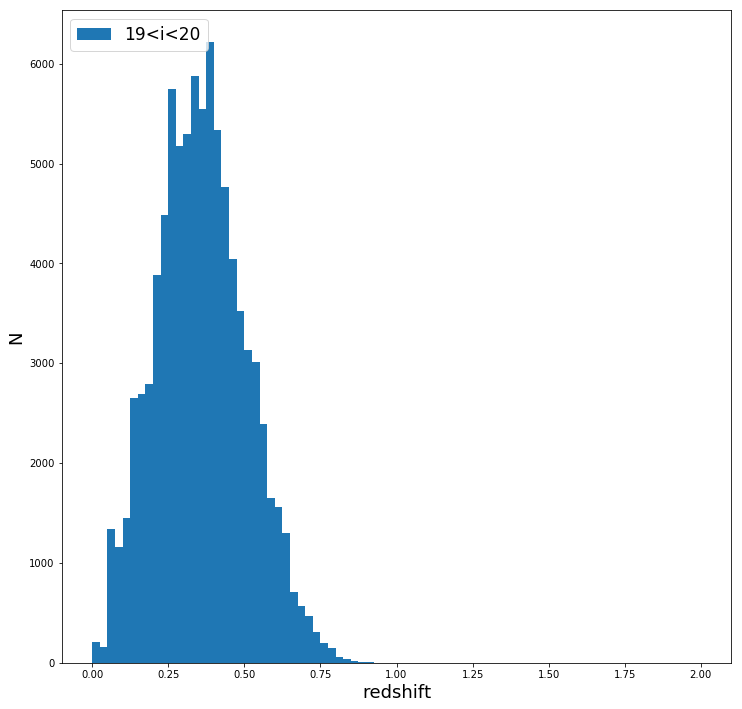

In [40]:
plt.figure(figsize=(12,12))
plt.hist(sz1,bins=80,range=(0.,2.),label = "19<i<20")
plt.xlabel("redshift",fontsize=18)
plt.ylabel("N",fontsize=18)
plt.legend(loc="upper left",fontsize=17)

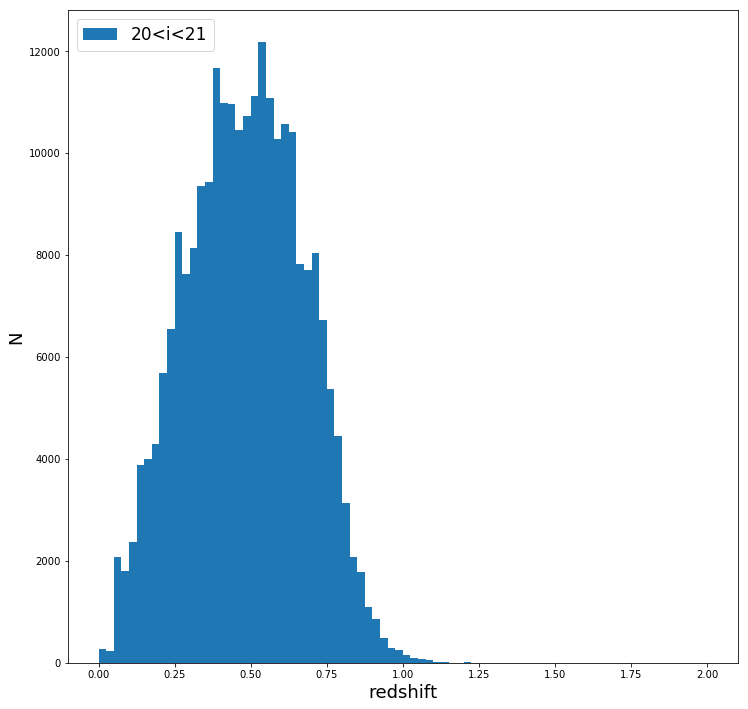

In [41]:
plt.figure(figsize=(12,12))
plt.hist(sz2,bins=80,range=(0.,2.),label = "20<i<21")
plt.xlabel("redshift",fontsize=18)
plt.ylabel("N",fontsize=18)
plt.legend(loc="upper left",fontsize=17)

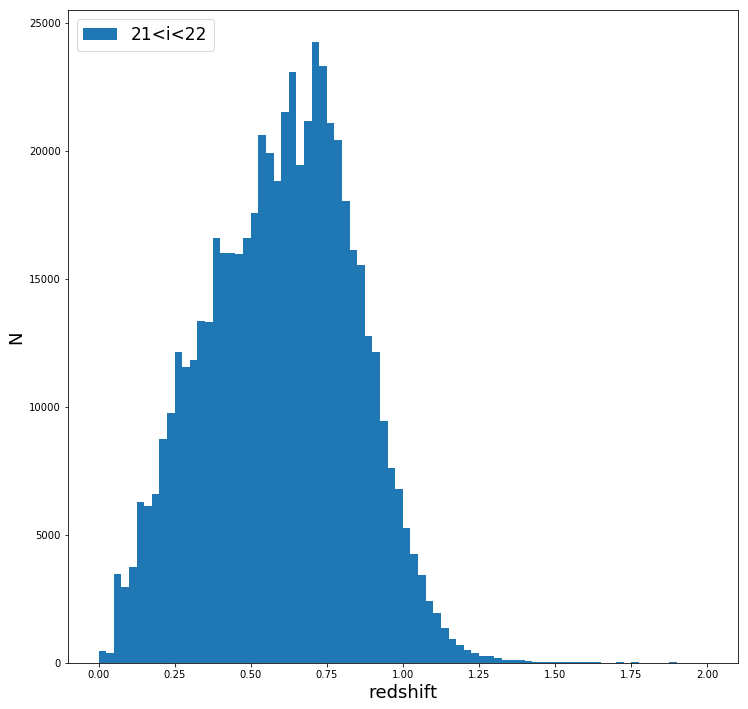

In [42]:
plt.figure(figsize=(12,12))
plt.hist(sz3,bins=80,range=(0.,2.),label = "21<i<22")
plt.xlabel("redshift",fontsize=18)
plt.ylabel("N",fontsize=18)
plt.legend(loc="upper left",fontsize=17)

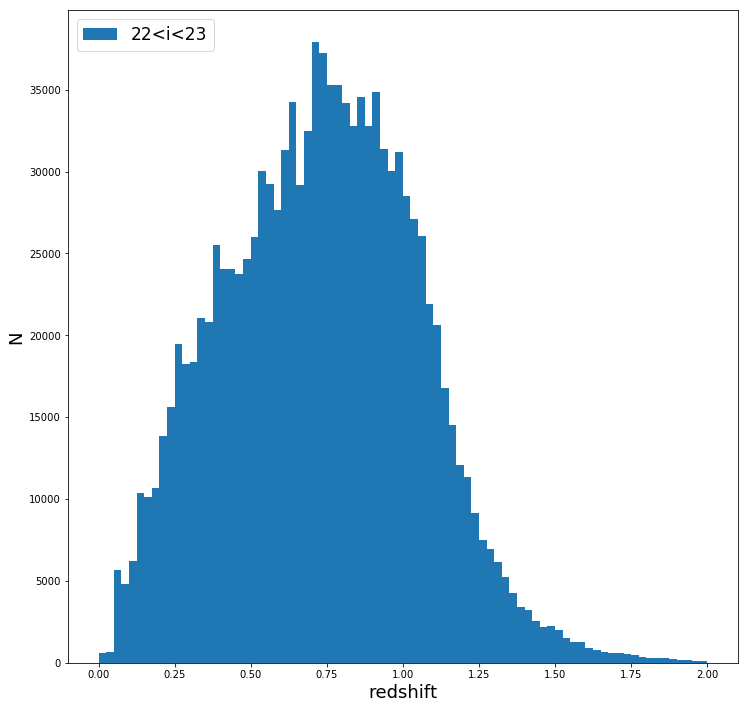

In [43]:
plt.figure(figsize=(12,12))
plt.hist(sz4,bins=80,range=(0.,2.),label = "22<i<23")
plt.xlabel("redshift",fontsize=18)
plt.ylabel("N",fontsize=18)
plt.legend(loc="upper left",fontsize=17)

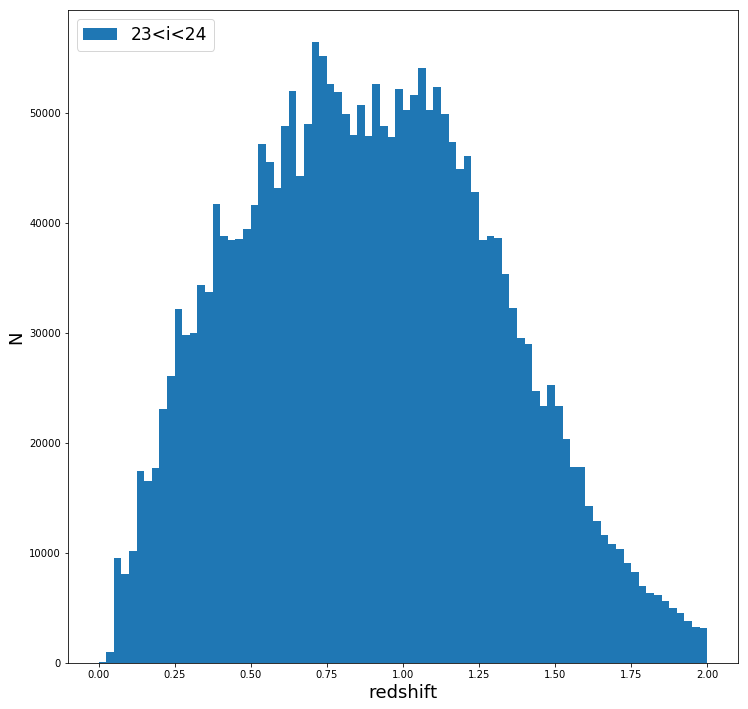

In [44]:
plt.figure(figsize=(12,12))
plt.hist(sz5,bins=80,range=(0.,2.),label = "23<i<24")
plt.xlabel("redshift",fontsize=18)
plt.ylabel("N",fontsize=18)
plt.legend(loc="upper left",fontsize=17)

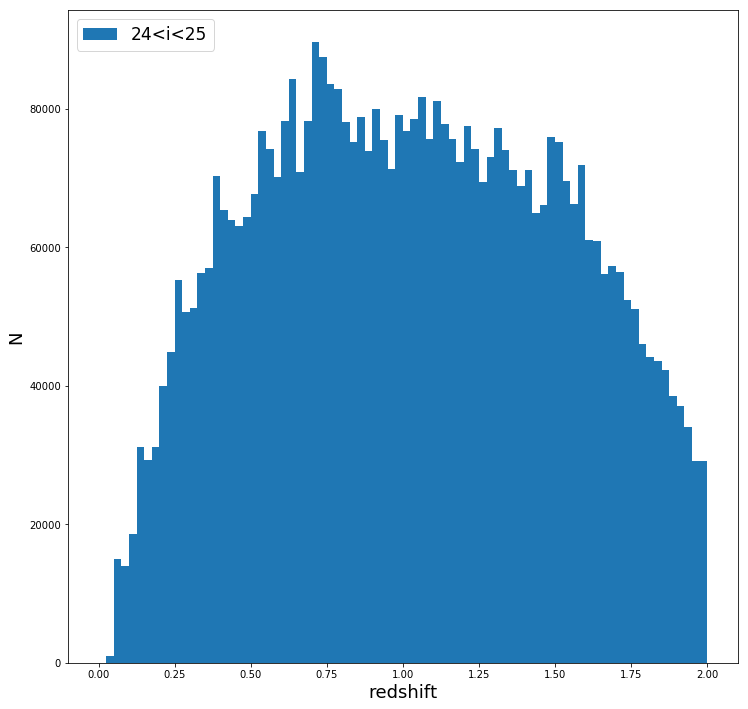

In [45]:
plt.figure(figsize=(12,12))
plt.hist(sz6,bins=80,range=(0.,2.),label = "24<i<25")
plt.xlabel("redshift",fontsize=18)
plt.ylabel("N",fontsize=18)
plt.legend(loc="upper left",fontsize=17)

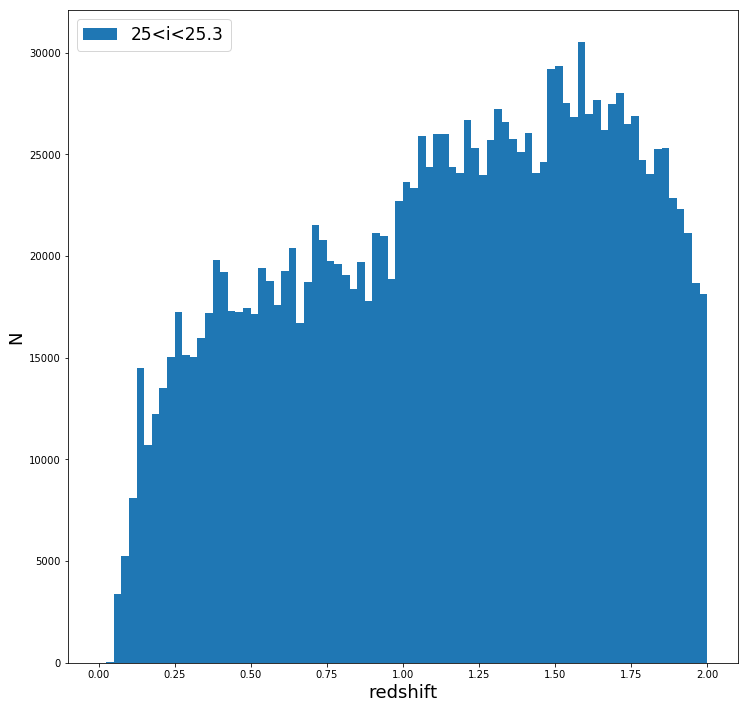

In [46]:
plt.figure(figsize=(12,12))
plt.hist(sz7,bins=80,range=(0.,2.),label = "25<i<25.3")
plt.xlabel("redshift",fontsize=18)
plt.ylabel("N",fontsize=18)
plt.legend(loc="upper left",fontsize=17)

In [48]:
xdata = gc.get_quantities(['mag_g_des','mag_r_des','mag_z_des'])
g = xdata['mag_g_des']
r = xdata['mag_r_des']
z = xdata['mag_z_des']

In [57]:
maskx = np.logical_and(np.logical_not((np.isnan(i))),np.logical_and(np.logical_not((np.isnan(r))),np.logical_not((np.isnan(g)))))
xg = g[maskx]
xr = r[maskx]
xi = i[maskx]

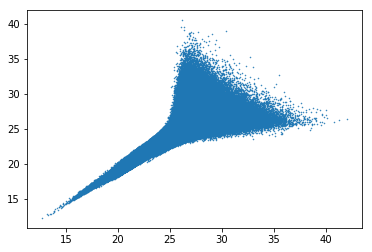

In [58]:
plt.scatter(xg,xr,marker='.',s=1)